## Check installation of tensorflow

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

hello = tf.constant("Hello TensorFlow!")
sess = tf.compat.v1.Session()
print(sess.run(hello))

b'Hello TensorFlow!'


## basic addition

In [ ]:
x = 2
y = 3
z = tf.add(x, y, name='Add')

with tf.compat.v1.Session() as sess:
    result = sess.run(z)
    print(result)

5


In [ ]:
a = tf.multiply(8,5)
b = tf.multiply(a,1)

with tf.compat.v1.Session() as sess:
    result1 = sess.run(a)
    result2 = sess.run(b)
    print(result1)
    print(result2)

40
40


In [ ]:
a = tf.multiply(8,5)
b = tf.multiply(4,3)

with tf.compat.v1.Session() as sess:
    result1 = sess.run(a)
    result2 = sess.run(b)
    print(result1)
    print(result2)

40
12


In [ ]:
graph = tf.Graph()

with graph.as_default():
    z = tf.add(x, y, name='Add')

tf.compat.v1.reset_default_graph()

## Sessions

In [ ]:
a = tf.multiply(3,3)
print(a)


Tensor("Mul_2:0", shape=(), dtype=int32)


In [ ]:
a = tf.multiply(3,3)
with tf.compat.v1.Session() as sess:
    print(sess.run(a))

9


## Variables

In [ ]:
x = tf.Variable(13)
W = tf.Variable(tf.random.normal([500, 111], stddev=0.35), name="weights")


In [ ]:
x = tf.Variable(1212)
init = tf.compat.v1.global_variables_initializer()
with tf.compat.v1.Session() as sess:
    sess.run(init)
    print(sess.run(x))

1212


In [ ]:
with tf.compat.v1.variable_scope("scope"):
  a = tf.compat.v1.get_variable('x', [2])
with tf.compat.v1.variable_scope("scope", reuse = True):
  b = tf.compat.v1.get_variable('x', [2])

## Constants

In [ ]:
x = tf.constant(13)

## Placeholder

In [ ]:
with tf.compat.v1.Session() as sess:
  x = tf.compat.v1.placeholder("float", None)
  y = x + 3
  result = sess.run(y, feed_dict={x: 5})
  print(result)

8.0


In [ ]:
with tf.compat.v1.Session() as sess:
  result = sess.run(y, feed_dict={x: [3,6,9]})
  print(result)

[ 6.  9. 12.]


In [ ]:
with tf.compat.v1.Session() as sess:
  x = tf.compat.v1.placeholder("float", [None, 2])
  y=x+3
  x_val = [[1, 2,],
            [3,4],
            [5,6],
            [7,8],]
  result = sess.run(y, feed_dict={x: x_val})
  print(result)



[[ 4.  5.]
 [ 6.  7.]
 [ 8.  9.]
 [10. 11.]]


## Tensorboard

In [ ]:
x = tf.constant(1,name='x')
y = tf.constant(1,name='y')
a = tf.constant(3,name='a')
b = tf.constant(3,name='b')


In [ ]:
prod1 = tf.multiply(x,y,name='prod1')
prod2 = tf.multiply(a,b,name='prod2')

In [ ]:
sum = tf.add(prod1,prod2,name='sum')

In [ ]:
with tf.compat.v1.Session() as sess:
    writer = tf.compat.v1.summary.FileWriter(logdir='./graph',graph=sess.graph)
    print(sess.run(sum))

10


In [ ]:
%load_ext tensorboard
%tensorboard --logdir=graphs --port=8000

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 8000 (pid 38897), started 0:02:09 ago. (Use '!kill 38897' to kill it.)

<IPython.core.display.Javascript object>

## Hand Written digit classification

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("No of images in training set {}".format(x_train.shape))
print("No of labels in training set {}".format(y_train.shape))
print("No of images in test set {}".format(x_test.shape))
print("No of labels in test set {}".format(y_test.shape))

No of images in training set (60000, 28, 28)
No of labels in training set (60000,)
No of images in test set (10000, 28, 28)
No of labels in test set (10000,)


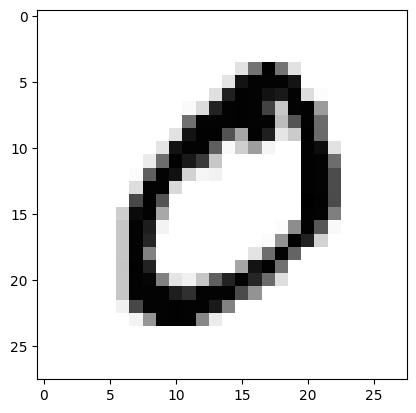

In [ ]:
img1 = x_train[1].reshape(28,28)
plt.imshow(img1, cmap='Greys')